# Step 1: Clone YOLOv5 Module


In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12313, done.
remote: Total 12313 (delta 0), reused 0 (delta 0), pack-reused 12313
Receiving objects: 100% (12313/12313), 11.52 MiB | 8.99 MiB/s, done.
Resolving deltas: 100% (8562/8562), done.
/content/yolov5
     |████████████████████████████████| 596 kB 4.3 MB/s 
     |████████████████████████████████| 145 kB 4.3 MB/s 
     |████████████████████████████████| 178 kB 38.5 MB/s 
     |████████████████████████████████| 1.1 MB 47.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 138 kB 48.7 MB/s 
     |████████████████████████████████| 63 kB 1.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascie

# **Step 2: Preparing Data Set For Object Detection :**



In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="l8P1GVNJCi4LEoHvpRG4")
project = rf.workspace("joseline-breeya").project("galaxy_detection_wcc_project")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Galaxy_Detection_WCC_Project-3 in yolov5pytorch:: 100%|██████████| 2168/2168 [00:01<00:00, 1135.05it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 25 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Galaxy_Detection_WCC_Project-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=25, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-75-g9c1e91a torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source https://youtu.be/475MWLKGTPg

Streaming output truncated to the last 5000 lines.
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.011s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.011s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.011s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.016s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Elliptical Galaxy, 1 Spiral Galaxy, Done. (0.011s)
0: 256x416 1 Spiral Galaxy, Done. (0.010s)
0: 256x416 1 Spiral Galaxy, Done. (0.011s)
0: 256x416 1 Spiral Galaxy, Done. (0.012s)
0: 256x416 1 Spiral Galaxy, Done. (0.010s)
0: 256x41

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading and Saving The Weights File and Test Images to our Drive and Can be Used Whenever Needed.

In [ ]:
import os
import shutil
shutil.move("/content/yolov5","/content/sample_data")

'/content/sample_data/yolov5'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dst="/content/drive/MyDrive/Galaxy"
src1="/content/sample_data/yolov5/runs/train/exp/weights/best.pt"
src2="/content/sample_data/yolov5/Galaxy_Detection_WCC_Project-3/test/images"
shutil.move(src1,dst)
shutil.move(src2,dst)

'/content/drive/MyDrive/Galaxy/images'

Running Interferences Once Again.. From the Images Stored in Test Images Using Saved Best.pt in Our Drive.

In [ ]:
!python detect.py --weights "/content/drive/MyDrive/Galaxy/best.pt" --img 416 --conf 0.1 --source "/content/drive/MyDrive/Galaxy/images"

detect: weights=['/content/drive/MyDrive/Galaxy/best.pt'], source=0, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-32-gc13d4ce torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 213 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
cv2.imshow() is disabled in Google Colab environments
[ WARN:0] global /io/opencv/modules/videoio/src/cap_v4l.cpp (802) open VIDEOIO ERROR: V4L: can't open camera by index 0
Traceback (most recent call last):
  File "detect.py", line 252, in <module>
    main(opt)
  File "detect.py", line 247, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autograd/

In [ ]:
!python detect.py --weights "/content/drive/MyDrive/Galaxy/best.pt" --img 416 --conf 0.1 --source https://youtu.be/475MWLKGTPg

python3: can't open file 'detect.py': [Errno 2] No such file or directory


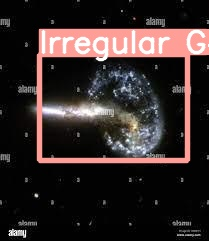

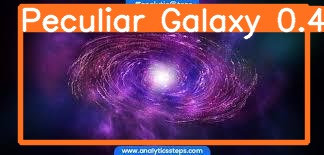

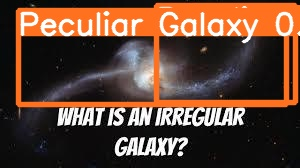

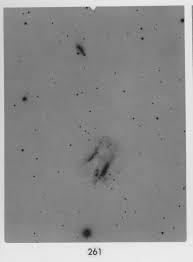

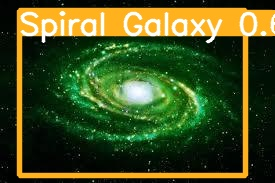

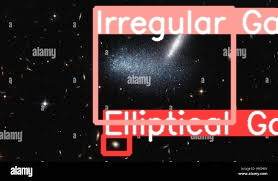

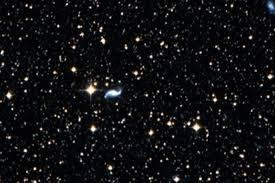

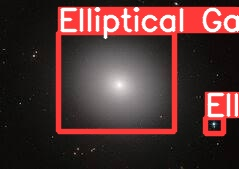

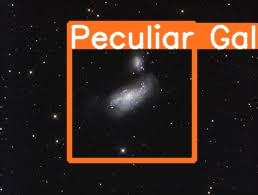

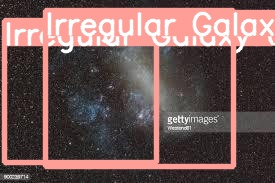

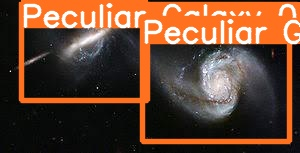

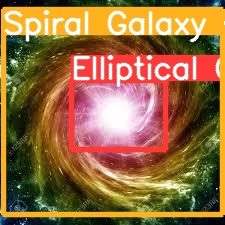

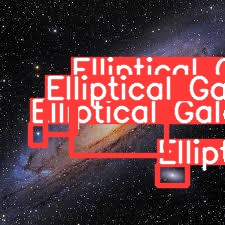

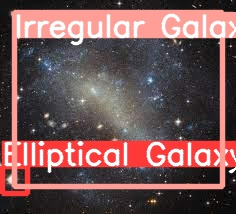

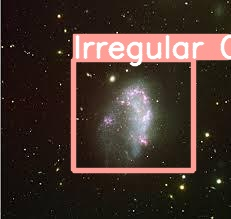

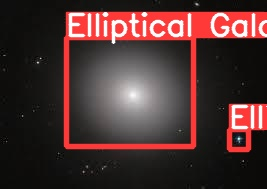

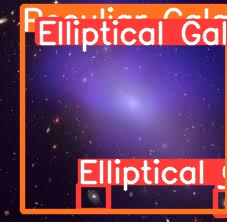

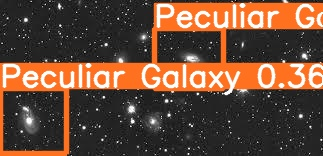

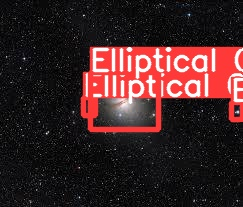

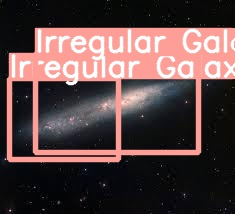

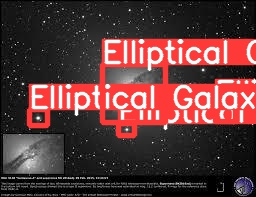

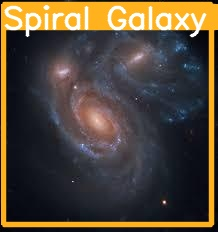

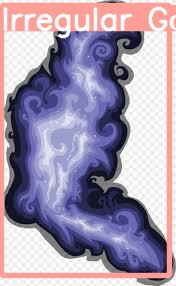

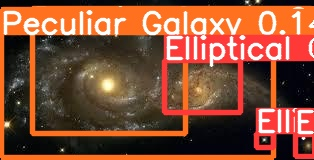

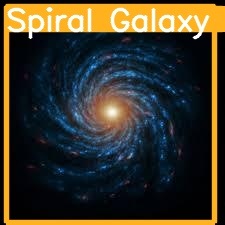

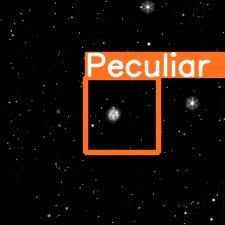

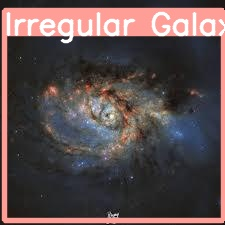

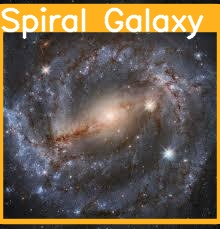

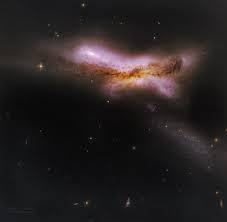

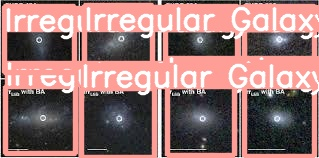

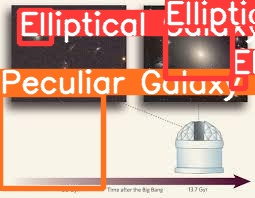

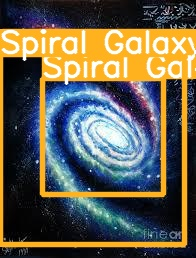

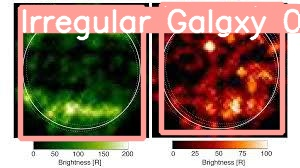

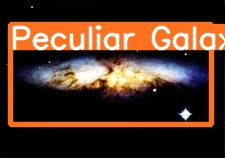

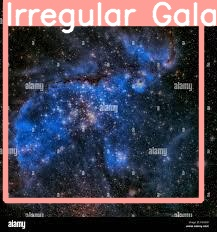

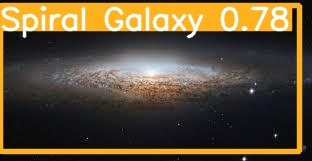

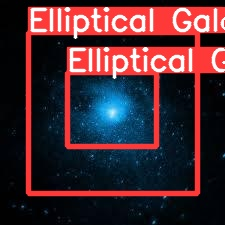

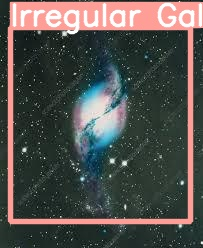

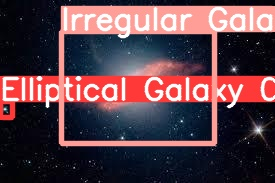

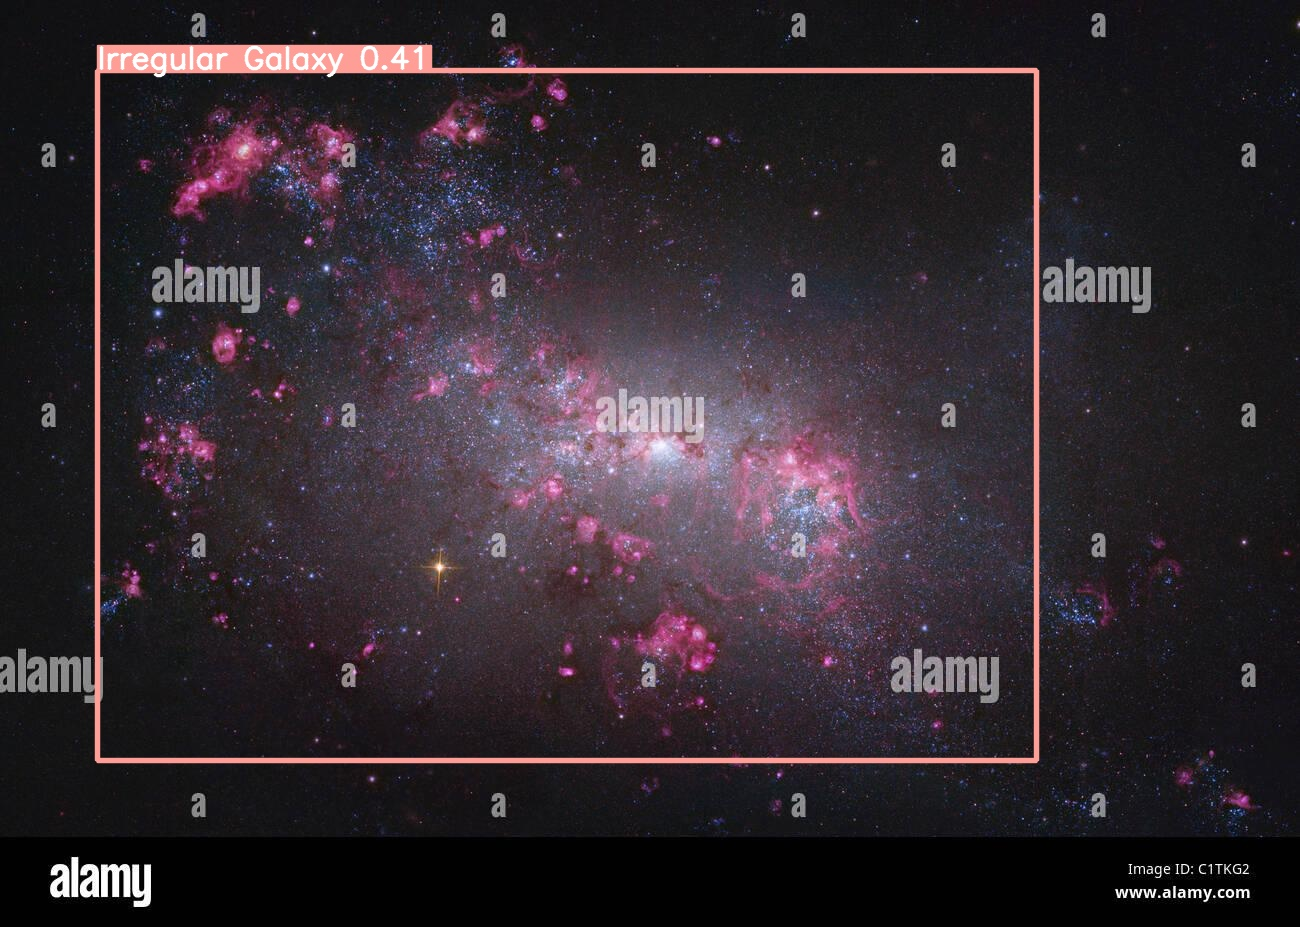

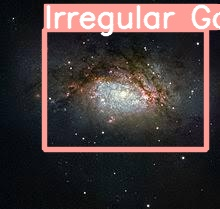

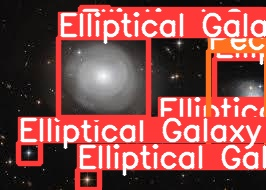

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/sample_data/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")